In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import pprint

from sklearn.model_selection import train_test_split
from sklearn import cluster as cl

## Get inference

In [2]:
df = pd.read_csv('genres_v2.csv')
df.sample(100).to_csv('test.csv')

/home/ghazal/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(5).T

0  \
danceability                                                  0.831   
energy                                                        0.814   
key                                                               2   
loudness                                                     -7.364   
mode                                                              1   
speechiness                                                    0.42   
acousticness                                                 0.0598   
instrumentalness                                             0.0134   
liveness                                                     0.0556   
valence                                                       0.389   
tempo                                                       156.985   
type                                                 audio_features   
id                                           2Vc6NJ9PW9gD9q343XFRKx   
uri                            spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
track_href        https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
analysis_url      https://api.spotify.com/v1/audio-analysis/2Vc6...   
duration_ms                                                  124539   
time_signature                                                    4   
genre                                                     Dark Trap   
song_name                                       Mercury: Retrograde   
Unnamed: 0                                                      NaN   
title                                                           NaN   

                                                                  1  \
danceability                                                  0.719   
energy                                                        0.493   
key                                                               8   
loudness                                                      -7.23   
mode                                                              1   
speechiness                                                  0.0794   
acousticness                                                  0.401   
instrumentalness                                                  0   
liveness                                                      0.118   
valence                                                       0.124   
tempo                                                        115.08   
type                                                 audio_features   
id                                           7pgJBLVz5VmnL7uGHmRj6p   
uri                            spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
track_href        https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
analysis_url      https://api.spotify.com/v1/audio-analysis/7pgJ...   
duration_ms                                                  224427   
time_signature                                                    4   
genre                                                     Dark Trap   
song_name                                                 Pathology   
Unnamed: 0                                                      NaN   
title                                                           NaN   

                                                                  2  \
danceability                                                   0.85   
energy                                                        0.893   
key                                                               5   
loudness                                                     -4.783   
mode                                                              1   
speechiness                                                  0.0623   
acousticness                                                 0.0138   
instrumentalness                                           4.14e-06   
liveness                                                      0.372   
valence                                                      0.0391   
tempo            

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
for column in df:
    if df[column].dtype == 'float64':
        df[column]=pd.to_numeric(df[column], downcast='float')
    if df[column].dtype == 'int64':
        df[column]=pd.to_numeric(df[column], downcast='integer')
df['genre'] = df['genre'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      42305 non-null  float32 
 1   energy            42305 non-null  float32 
 2   key               42305 non-null  int8    
 3   loudness          42305 non-null  float32 
 4   mode              42305 non-null  int8    
 5   speechiness       42305 non-null  float32 
 6   acousticness      42305 non-null  float32 
 7   instrumentalness  42305 non-null  float32 
 8   liveness          42305 non-null  float32 
 9   valence           42305 non-null  float32 
 10  tempo             42305 non-null  float32 
 11  type              42305 non-null  object  
 12  id                42305 non-null  object  
 13  uri               42305 non-null  object  
 14  track_href        42305 non-null  object  
 15  analysis_url      42305 non-null  object  
 16  duration_ms       4230

In [7]:
df.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [8]:
df.drop(labels =['track_href','uri','Unnamed: 0','title'],inplace=True,axis=1)

In [9]:
df.describe().T

count           mean            std           min  \
danceability      42305.0       0.639364       0.156617      0.065100   
energy            42305.0       0.762516       0.183823      0.000243   
key               42305.0       5.370240       3.666145      0.000000   
loudness          42305.0      -6.465442       2.941165    -33.356998   
mode              42305.0       0.549462       0.497553      0.000000   
speechiness       42305.0       0.136561       0.126168      0.022700   
acousticness      42305.0       0.096160       0.170827      0.000001   
instrumentalness  42305.0       0.283048       0.370791      0.000000   
liveness          42305.0       0.214079       0.175576      0.010700   
valence           42305.0       0.357101       0.233200      0.018700   
tempo             42305.0     147.474060      23.844624     57.966999   
duration_ms       42305.0  250865.846685  102957.713571  25600.000000   
time_signature    42305.0       3.972580       0.268342      1.000000   

                           25%            50%            75%            max  
danceability           0.52400       0.646000       0.766000       0.988000  
energy                 0.63200       0.803000       0.923000       1.000000  
key                    1.00000       6.000000       9.000000      11.000000  
loudness              -8.16100      -6.234000      -4.513000       3.148000  
mode                   0.00000       1.000000       1.000000       1.000000  
speechiness            0.04910       0.075500       0.193000       0.946000  
acousticness           0.00173       0.016400       0.107000       0.988000  
instrumentalness       0.00000       0.005940       0.722000       0.989000  
liveness               0.09960       0.135000       0.294000       0.988000  
valence                0.16100       0.322000       0.522000       0.988000  
tempo                129.93100     144.973007     161.464005     220.289993  
duration_ms       179840.00000  224760.000000  301133.000000  913052.000000  
time_signature         4.00000       4.000000       4.000000       5.000000

## Visualisations

In [10]:
import matplotlib
spotify_green = "#1DB954"
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [spotify_green,"white"])
plt.style.use("dark_background")
matplotlib.cm.register_cmap("mycolormap", cmap)
cpal = sns.color_palette("mycolormap", n_colors=17, desat=1)
sns.set_palette(cpal)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]), [])

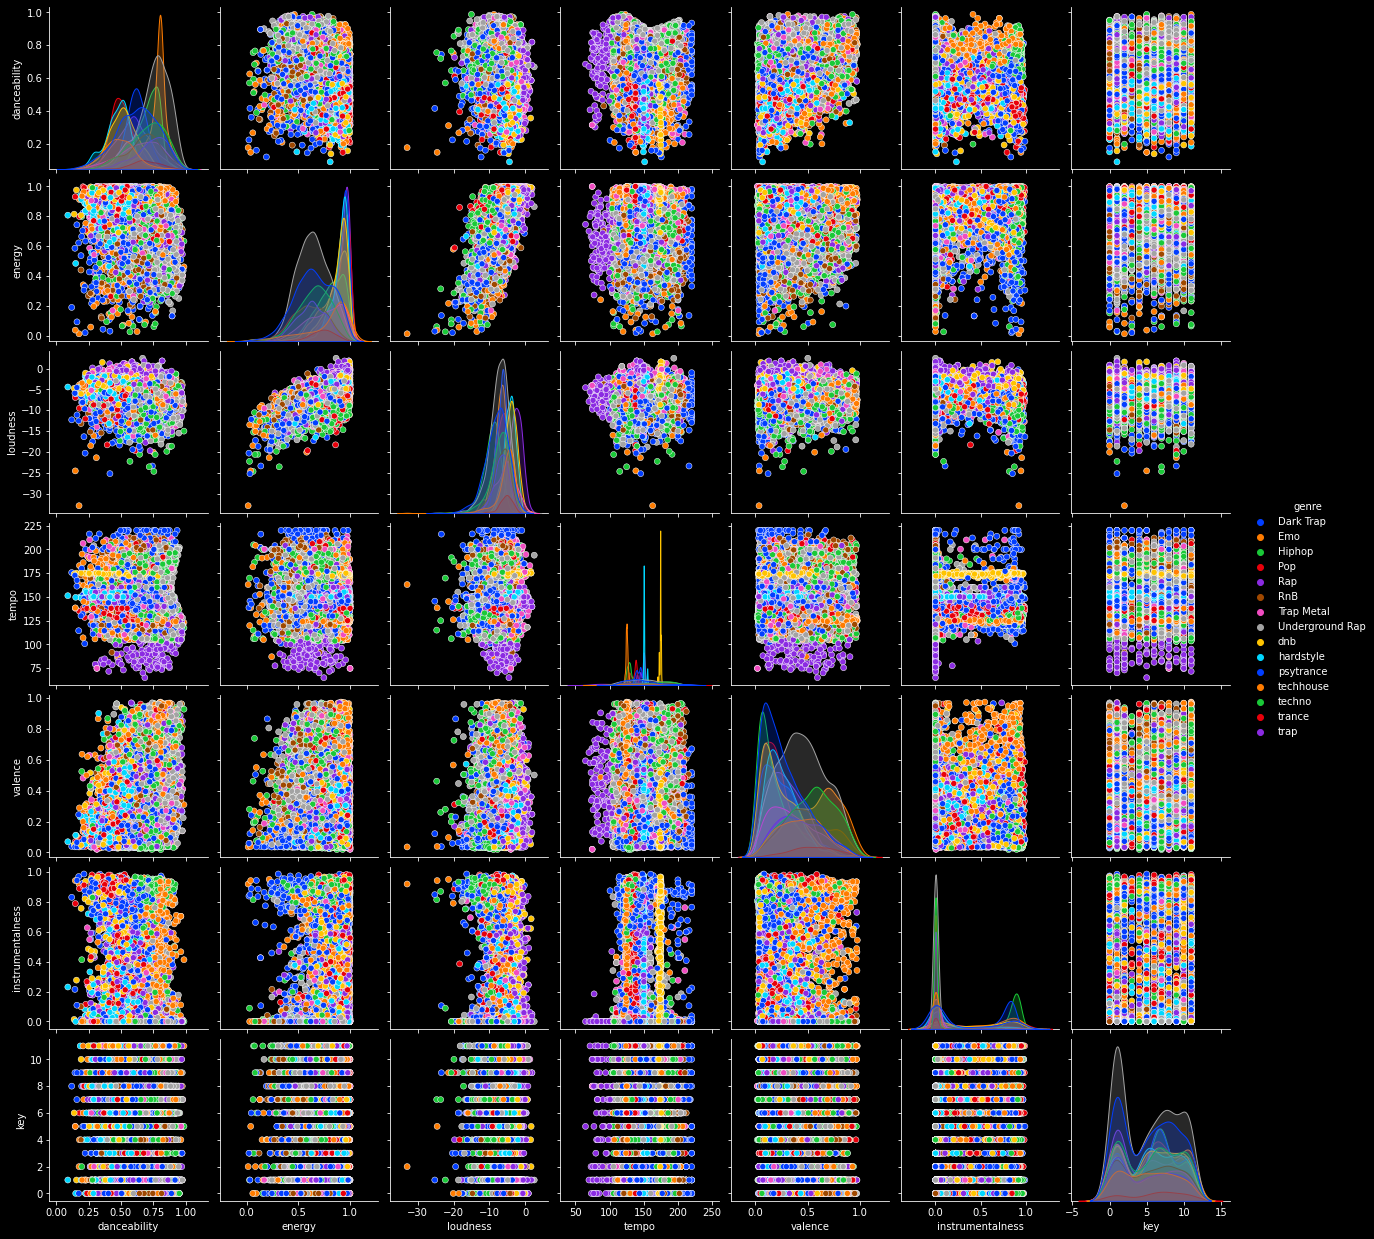

In [11]:
sns.pairplot(df[['danceability','energy','loudness','tempo','valence','genre','instrumentalness','key']].sample(10_000),hue='genre',palette='bright')
plt.xticks(size=20)
plt.yticks(size=20)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'danceability'),
  Text(0, 1.5, 'energy'),
  Text(0, 2.5, 'key'),
  Text(0, 3.5, 'loudness'),
  Text(0, 4.5, 'mode'),
  Text(0, 5.5, 'speechiness'),
  Text(0, 6.5, 'acousticness'),
  Text(0, 7.5, 'instrumentalness'),
  Text(0, 8.5, 'liveness'),
  Text(0, 9.5, 'valence'),
  Text(0, 10.5, 'tempo'),
  Text(0, 11.5, 'duration_ms'),
  Text(0, 12.5, 'time_signature')])

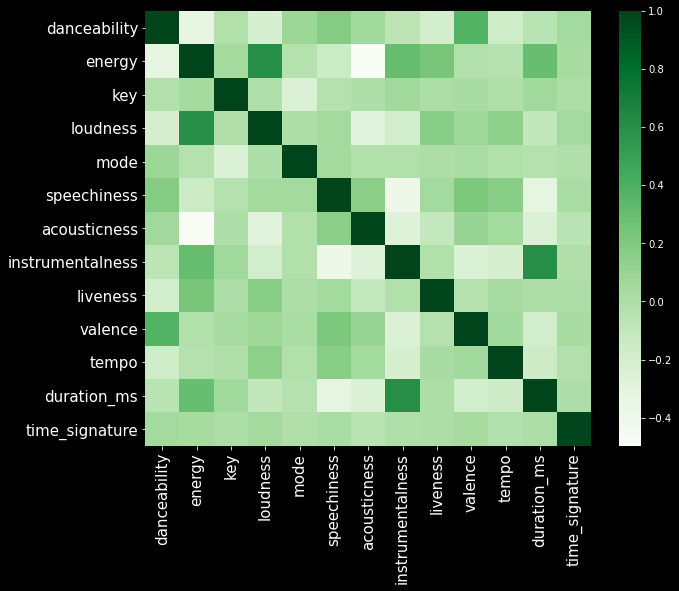

In [12]:
plt.rcParams["figure.figsize"]=10,8

corr = df.corr()
sns.heatmap(corr,cmap="Greens")
plt.xticks(size=15)
plt.yticks(size=15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Dark Trap'),
  Text(1, 0, 'Emo'),
  Text(2, 0, 'Hiphop'),
  Text(3, 0, 'Pop'),
  Text(4, 0, 'Rap'),
  Text(5, 0, 'RnB'),
  Text(6, 0, 'Trap Metal'),
  Text(7, 0, 'Underground Rap'),
  Text(8, 0, 'dnb'),
  Text(9, 0, 'hardstyle'),
  Text(10, 0, 'psytrance'),
  Text(11, 0, 'techhouse'),
  Text(12, 0, 'techno'),
  Text(13, 0, 'trance'),
  Text(14, 0, 'trap')])

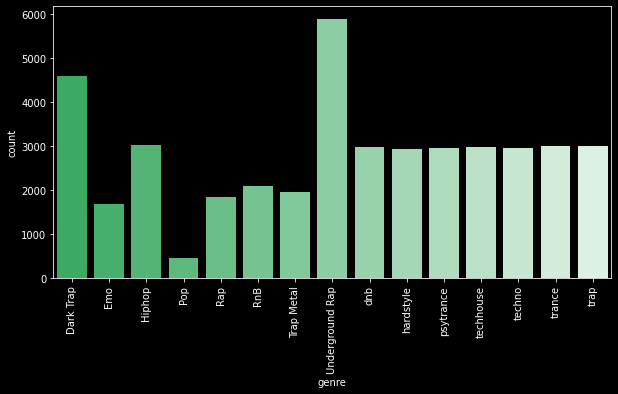

In [13]:
plt.rcParams["figure.figsize"]=10,5
sns.countplot(df['genre'])
plt.xticks(rotation=90)


<AxesSubplot:xlabel='danceability', ylabel='loudness'>

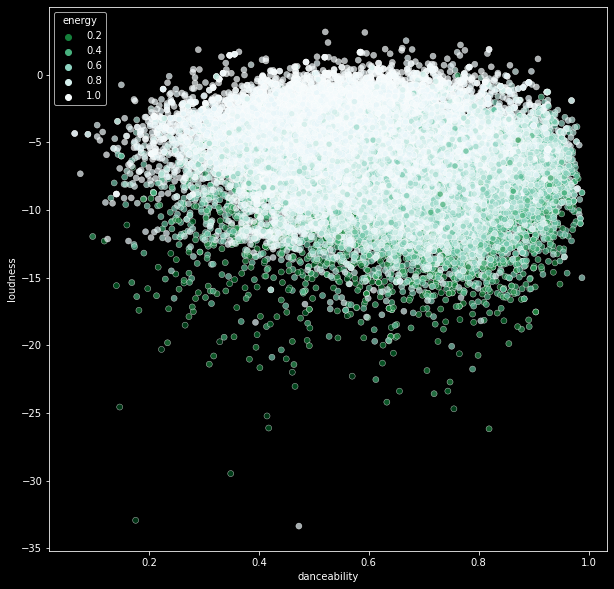

In [14]:
# sns.pairplot(df)
plt.rcParams["figure.figsize"]=10,10
sns.scatterplot(data = df, x = 'danceability',y='loudness',hue='energy',palette='BuGn_r',alpha=0.7)

<AxesSubplot:xlabel='tempo', ylabel='danceability'>

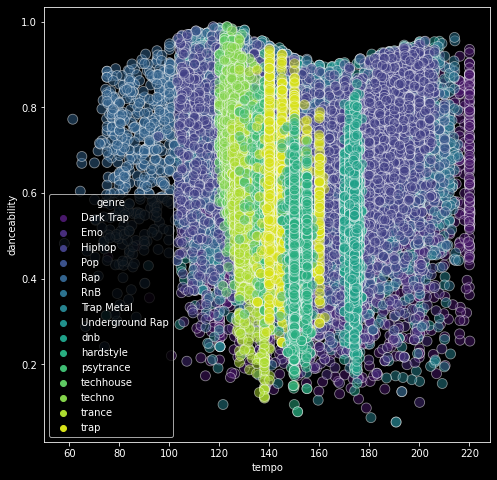

In [15]:
plt.rcParams["figure.figsize"]=8,8
sns.set_palette("Paired")
sns.scatterplot(x = df['tempo'],y = df['danceability'], hue = df['genre'],palette='viridis',s=100,alpha=0.5)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='key', ylabel='count'>

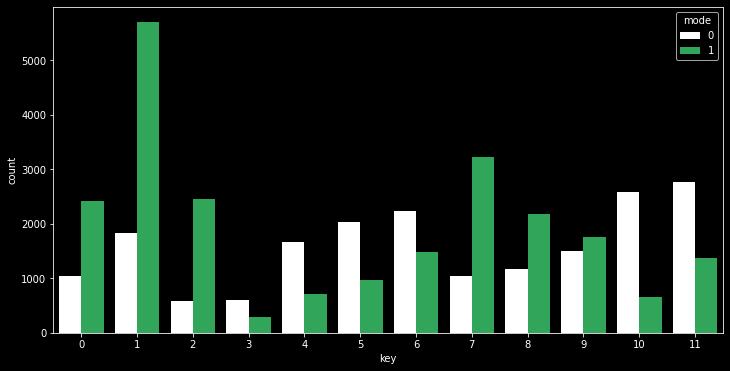

In [16]:
plt.rcParams["figure.figsize"]=12,6
sns.countplot(df['key'],hue=df['mode'],palette=['white','#1DB954'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='valence', ylabel='key'>

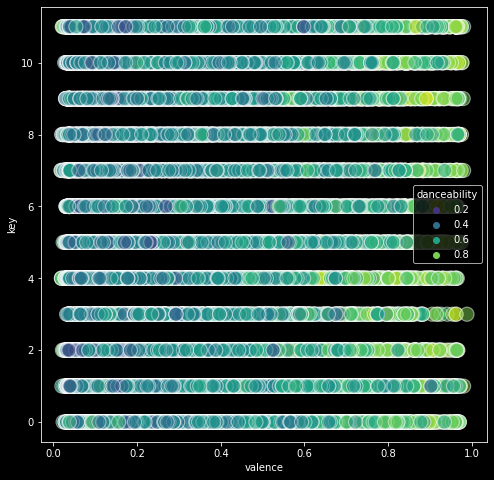

In [17]:
plt.rcParams["figure.figsize"]=8,8
sns.scatterplot(df['valence'],df['key'],hue=df['danceability'],palette='viridis',s=200,alpha=0.5)

## Preprocessing

In [18]:
def normal(column):
    df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())
for col in ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']:
    normal(col)

In [19]:
core = df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre']]

In [20]:
from sklearn.feature_selection import SelectKBest, chi2
df_reduced = SelectKBest(chi2,k=5).fit_transform(core.drop(labels=['genre'],axis=1,inplace = False),y=core['genre'])
df_reduced.shape


(42305, 5)

## Processing

In [21]:
df_train, df_test,genre_train, genre_test= train_test_split(df_reduced,core['genre'],test_size = 0.1, shuffle = True)

In [22]:
groups_count = range(5,20)
results ={}
results['kmeans'] = {'clusters_no':groups_count,'train_score':[],'test_score':[],'train_inertia':[],'duration':[],'models':[],'y':[]}

for gc in groups_count:
    st = time.perf_counter()
    kmeans = cl.KMeans(gc)
    y=kmeans.fit_predict(df_train)
    ed = time.perf_counter()
    results['kmeans']['models'].append(kmeans)
    results['kmeans']['y'].append(y)
    results['kmeans']['train_score'].append(kmeans.score(df_train)/len(df_train))
    results['kmeans']['test_score'].append(kmeans.score(df_test)/len(df_test))
    results['kmeans']['train_inertia'].append(kmeans.inertia_)
    results['kmeans']['duration'].append(ed-st)


In [23]:
pprint.pprint(results)

{'kmeans': {'clusters_no': range(5, 20),
            'duration': [0.6504105549993255,
                         0.8526446819996636,
                         0.7332040159999451,
                         1.2115322199997536,
                         0.8389298420006526,
                         1.1241520899993702,
                         1.0222204130004684,
                         1.0770415919996594,
                         1.1487228759997379,
                         1.3182686650006872,
                         1.657984817000397,
                         1.5094349720002356,
                         1.6713998610002818,
                         1.652498862000357,
                         1.9548628339998686],
            'models': [KMeans(n_clusters=5),
                       KMeans(n_clusters=6),
                       KMeans(n_clusters=7),
                       KMeans(),
                       KMeans(n_clusters=9),
                       KMeans(n_clusters=10),
                       KMe

In [24]:
# df_train

<AxesSubplot:>

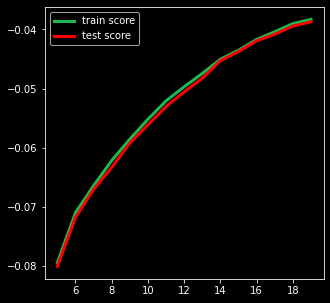

In [25]:
plt.rcParams["figure.figsize"]=5,5
sns.lineplot(x=groups_count,y=results['kmeans']['train_score'],color=spotify_green,linewidth = 3,markers=True,dashes=False,label='train score')
sns.lineplot(x=groups_count,y=results['kmeans']['test_score'],color='red',linewidth = 3,markers=True,dashes=False,label = 'test score')


<AxesSubplot:>

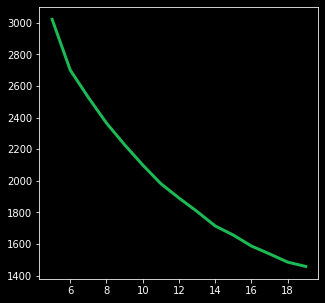

In [26]:
sns.lineplot(x=groups_count,y=results['kmeans']['train_inertia'],color=spotify_green,linewidth = 3)


In [27]:
from kneed import KneeLocator
k = KneeLocator(groups_count,results['kmeans']['train_inertia'],curve='convex',direction='decreasing')  
k.elbow

11

In [28]:
best_k=k.elbow-5
final_model = results['kmeans']['models'][best_k]
final_y = results['kmeans']['y'][best_k]

import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(final_model, f)

In [29]:
results['kmeans']['clusters_no'][best_k]

11

In [30]:
results

{'kmeans': {'clusters_no': range(5, 20),
  'train_score': [-0.07938333030332378,
   -0.07095704176611664,
   -0.06639843344744774,
   -0.06213954727758773,
   -0.058535539447030785,
   -0.05517183129399328,
   -0.052067964199855876,
   -0.049681687408894525,
   -0.047440305392131114,
   -0.04503687578896524,
   -0.04351854732621835,
   -0.041698178680415116,
   -0.0403900891910326,
   -0.03902039064757118,
   -0.038302611182540906],
  'test_score': [-0.08003360727554065,
   -0.0717548612893487,
   -0.06702038830996292,
   -0.06331521820667026,
   -0.059187288403764624,
   -0.056105716266239884,
   -0.053026625349909894,
   -0.05054588380983552,
   -0.0482488464052529,
   -0.045277259446182196,
   -0.043742299558873494,
   -0.041936572802261214,
   -0.040815699159662315,
   -0.03942265214155932,
   -0.03872902819913658],
  'train_inertia': [3022.440673828125,
   2701.61865234375,
   2528.0537109375,
   2365.901123046875,
   2228.682373046875,
   2100.61279296875,
   1982.4359130859375,


In [31]:
pd.Series(final_y).value_counts()

2     5447
0     4783
6     4703
5     4476
4     3813
10    3631
8     2914
3     2771
1     2230
9     1754
7     1552
dtype: int64

<AxesSubplot:ylabel='count'>

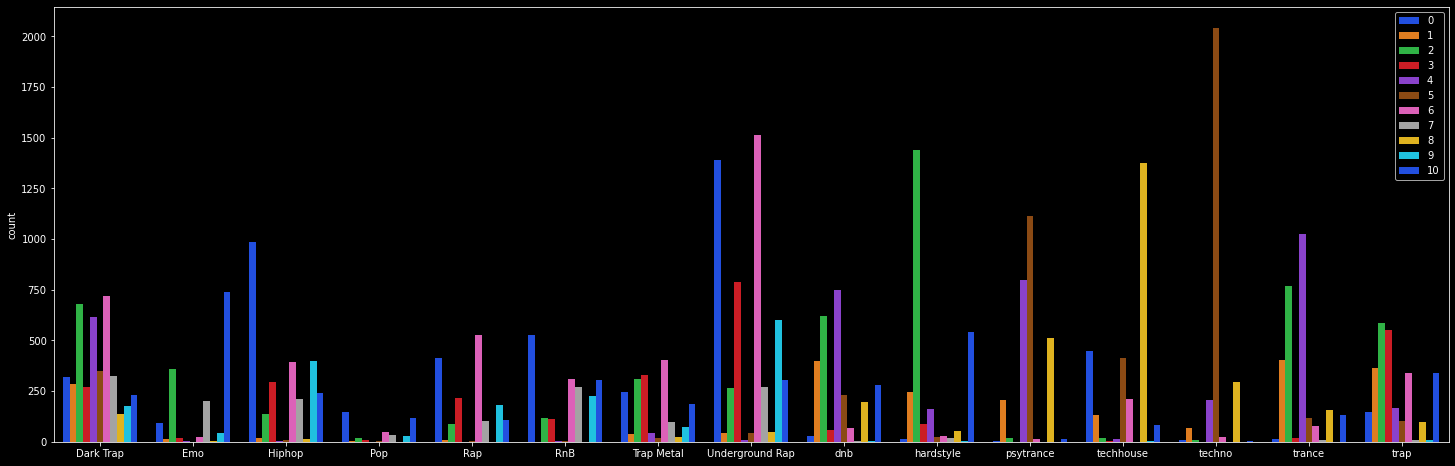

In [32]:
plt.rcParams["figure.figsize"]=25,8
sns.countplot(hue=final_y,x=genre_train.values,palette='bright')

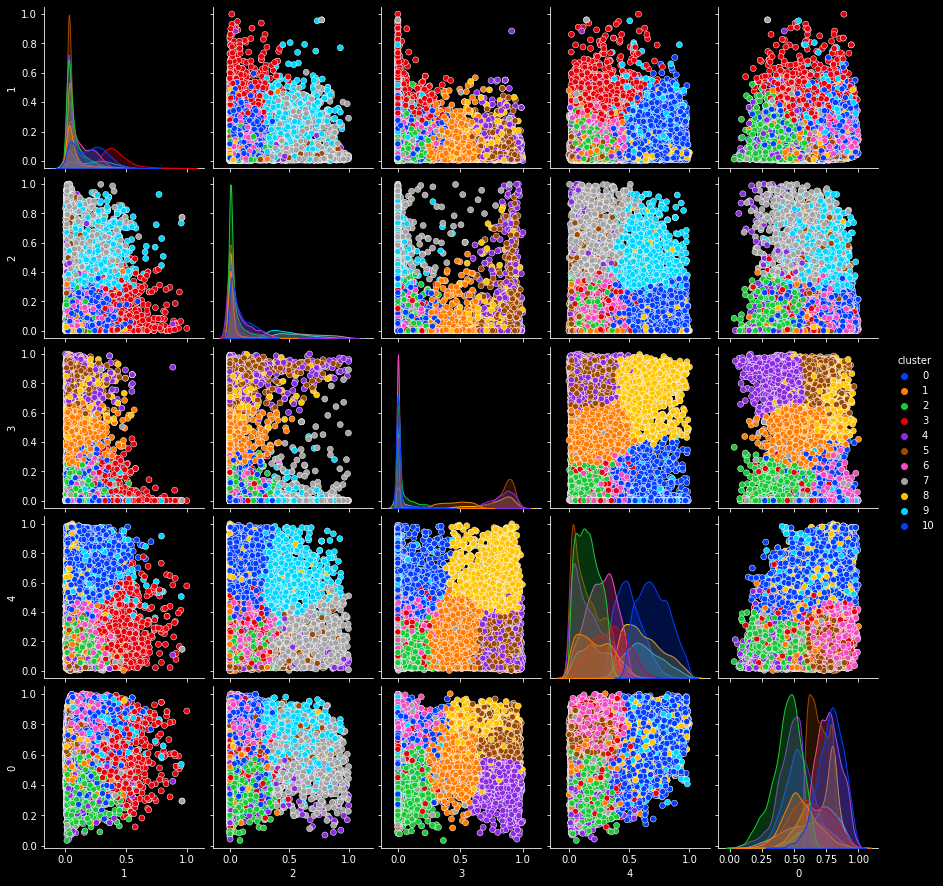

In [33]:
plt.rcParams["figure.figsize"]=10,10
dfn =pd.DataFrame({1:df_train[:,1],2:df_train[:,2],3:df_train[:,3],4:df_train[:,4],0:df_train[:,0],'genre':genre_train,'cluster':final_y}).sample(20_000)
sns.pairplot(dfn,hue='cluster',palette='bright')

In [34]:
df_train

array([[0.2545238 , 0.02956786, 0.00547463, 0.04317492, 0.10141339],
       [0.21334922, 0.03433337, 0.13056585, 0.        , 0.02702982],
       [0.57850254, 0.02003683, 0.00312645, 0.20626895, 0.04302074],
       ...,
       [0.5405786 , 0.34907398, 0.12955372, 0.        , 0.7420819 ],
       [0.8233828 , 0.0484133 , 0.00355155, 0.00505561, 0.6626432 ],
       [0.77462345, 0.19744396, 0.0034807 , 0.00123357, 0.3397297 ]],
      dtype=float32)

## Recommendation

In [35]:
df_input = pd.read_csv('test.csv')

In [36]:
df_input.drop(labels =['track_href','uri','Unnamed: 0'],inplace=True,axis=1)
for column in df_input:
    if df_input[column].dtype == 'float64':
        df_input[column]=pd.to_numeric(df_input[column], downcast='float')
    if df_input[column].dtype == 'int64':
        df_input[column]=pd.to_numeric(df_input[column], downcast='integer')
df_input['genre'] = df_input['genre'].astype('category')

def normal(column):
    df_input[column] = (df_input[column]-df_input[column].min())/(df_input[column].max()-df_input[column].min())
for col in ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']:
    normal(col)
i_core = df_input[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre']]
i_reduced = SelectKBest(chi2,k=5).fit_transform(i_core.drop(labels=['genre'],axis=1,inplace = False),y=i_core['genre'])


In [37]:
prediction = final_model.predict(i_reduced)
pred_vals = pd.Series(prediction).value_counts()

### Five Daily Mixes

In [38]:
five_topmost_groups = []
if len( pred_vals) >= 5:
    five_topmost_groups = pred_vals[:5]
else: 
    while len(five_topmost_groups) < 5:
        r = random.random(0,best_k)
        if r not in five_topmost_groups:
            five_topmost_groups.append(r)

In [39]:
for i,cl in enumerate(five_topmost_groups.index):
    co_clusters = dfn[dfn['cluster']==cl]
    print(cl)
    print(co_clusters[:5].index)
    df.iloc[co_clusters[:5].index].to_csv(f'Daily Mix {i+1}.csv')

6
Int64Index([7125, 23652, 4796, 14820, 19598], dtype='int64')
5
Int64Index([26180, 4199, 3159, 25814, 32749], dtype='int64')
3
Int64Index([15924, 14024, 5305, 35533, 7754], dtype='int64')
0
Int64Index([6519, 1277, 35960, 21444, 21295], dtype='int64')
10
Int64Index([36876, 34641, 40155, 5384, 39419], dtype='int64')


### Top songs from all cluster

In [40]:
centers = final_model.cluster_centers_
print(centers)

[[0.78416383 0.1980411  0.08434592 0.02145138 0.70662117]
 [0.5470726  0.07161099 0.02582795 0.4611071  0.21500263]
 [0.44200784 0.0749183  0.04145424 0.03602153 0.16004874]
 [0.6276222  0.42056024 0.08765419 0.017721   0.33875966]
 [0.45188862 0.0466583  0.03449761 0.83882    0.16590926]
 [0.6985379  0.04905821 0.04288789 0.8554596  0.1491604 ]
 [0.7700385  0.12510234 0.0845917  0.01605684 0.26819855]
 [0.57345766 0.1086764  0.6181135  0.02878591 0.23273161]
 [0.7094468  0.0549456  0.02183901 0.7865921  0.6191516 ]
 [0.7083172  0.23701224 0.4819472  0.00526309 0.6132884 ]
 [0.5309027  0.0777678  0.04951359 0.02345815 0.49894083]]


In [42]:
def distance(a,b):
    return np.linalg.norm(np.array(a)-np.array(b))

top_songs_at_all = pd.DataFrame()
for c,center in enumerate(centers):
    all_in_cluster = dfn[dfn['cluster']==c]
    distances = [{i.name:distance(center,i)} for i in dfn.drop(['genre','cluster'],axis = 1).iloc]
    distances.sort(key=lambda x:[i for i in x.values()][0])
    closests_to_center = [i for i in [distances[0].keys(),distances[1].keys()]]

    top_songs_at_all = top_songs_at_all.append(df.loc[closests_to_center[0]])
    top_songs_at_all = top_songs_at_all.append(df.loc[closests_to_center[1]])

top_songs_at_all.to_csv('top_songs.csv')
